In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.4f}'.format)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor





# <span style="color:red">Loaing The Datasets</span>

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL      65.0000     8450   Pave   NaN      Reg   
1   2          20       RL      80.0000     9600   Pave   NaN      Reg   
2   3          60       RL      68.0000    11250   Pave   NaN      IR1   
3   4          70       RL      60.0000     9550   Pave   NaN      IR1   
4   5          60       RL      84.0000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH      80.0000    11622   Pave   NaN      Reg   
1  1462          20       RL      81.0000    14267   Pave   NaN      IR1   
2  1463          60       RL      74.0000    13830   Pave   NaN      IR1   
3  1464          60       RL      78.0000     9978   Pave   NaN      IR1   
4  1465         120       RL      43.0000     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

# <span style="color:red">EDA</span>

In [7]:
df_train.describe().T

count        mean        std        min         25%  \
Id            1460.0000    730.5000   421.6100     1.0000    365.7500   
MSSubClass    1460.0000     56.8973    42.3006    20.0000     20.0000   
LotFrontage   1201.0000     70.0500    24.2848    21.0000     59.0000   
LotArea       1460.0000  10516.8281  9981.2649  1300.0000   7553.5000   
OverallQual   1460.0000      6.0993     1.3830     1.0000      5.0000   
OverallCond   1460.0000      5.5753     1.1128     1.0000      5.0000   
YearBuilt     1460.0000   1971.2678    30.2029  1872.0000   1954.0000   
YearRemodAdd  1460.0000   1984.8658    20.6454  1950.0000   1967.0000   
MasVnrArea    1452.0000    103.6853   181.0662     0.0000      0.0000   
BsmtFinSF1    1460.0000    443.6397   456.0981     0.0000      0.0000   
BsmtFinSF2    1460.0000     46.5493   161.3193     0.0000      0.0000   
BsmtUnfSF     1460.0000    567.2404   441.8670     0.0000    223.0000   
TotalBsmtSF   1460.0000   1057.4295   438.7053     0.0000    795.7500   
1stFlrSF      1460.0000   1162.6267   386.5877   334.0000    882.0000   
2ndFlrSF      1460.0000    346.9925   436.5284     0.0000      0.0000   
LowQualFinSF  1460.0000      5.8445    48.6231     0.0000      0.0000   
GrLivArea     1460.0000   1515.4637   525.4804   334.0000   1129.5000   
BsmtFullBath  1460.0000      0.4253     0.5189     0.0000      0.0000   
BsmtHalfBath  1460.0000      0.0575     0.2388     0.0000      0.0000   
FullBath      1460.0000      1.5651     0.5509     0.0000      1.0000   
HalfBath      1460.0000      0.3829     0.5029     0.0000      0.0000   
BedroomAbvGr  1460.0000      2.8664     0.8158     0.0000      2.0000   
KitchenAbvGr  1460.0000      1.0466     0.2203     0.0000      1.0000   
TotRmsAbvGrd  1460.0000      6.5178     1.6254     2.0000      5.0000   
Fireplaces    1460.0000      0.6130     0.6447     0.0000      0.0000   
GarageYrBlt   1379.0000   1978.5062    24.6897  1900.0000   1961.0000   
GarageCars    1460.0000      1.7671     0.7473     0.0000      1.0000   
GarageArea    1460.0000    472.9801   213.8048     0.0000    334.5000   
WoodDeckSF    1460.0000     94.2445   125.3388     0.0000      0.0000   
OpenPorchSF   1460.0000     46.6603    66.2560     0.0000      0.0000   
EnclosedPorch 1460.0000     21.9541    61.1191     0.0000      0.0000   
3SsnPorch     1460.0000      3.4096    29.3173     0.0000      0.0000   
ScreenPorch   1460.0000     15.0610    55.7574     0.0000      0.0000   
PoolArea      1460.0000      2.7589    40.1773     0.0000      0.0000   
MiscVal       1460.0000     43.4890   496.1230     0.0000      0.0000   
MoSold        1460.0000      6.3219     2.7036     1.0000      5.0000   
YrSold        1460.0000   2007.8158     1.3281  2006.0000   2007.0000   
SalePrice     1460.0000 180921.1959 79442.5029 34900.0000 129975.0000   

                      50%         75%         max  
Id               730.5000   1095.2500   1460.0000  
MSSubClass        50.0000     70.0000    190.0000  
LotFrontage       69.0000     80.0000    313.0000  
LotArea         9478.5000  11601.5000 215245.0000  
OverallQual        6.0000      7.0000     10.0000  
OverallCond        5.0000      6.0000      9.0000  
YearBuilt       1973.0000   2000.0000   2010.0000  
YearRemodAdd    1994.0000   2004.0000   2010.0000  
MasVnrArea         0.0000    166.0000   1600.0000  
BsmtFinSF1       383.5000    712.2500   5644.0000  
BsmtFinSF2         0.0000      0.0000   1474.0000  
BsmtUnfSF        477.5000    808.0000   2336.0000  
TotalBsmtSF      991.5000   1298.2500   6110.0000  
1stFlrSF        1087.0000   1391.2500   4692.0000  
2ndFlrSF           0.0000    728.0000   2065.0000  
LowQualFinSF       0.0000      0.0000    572.0000  
GrLivArea       1464.0000   1776.7500   5642.0000  
BsmtFullBath       0.0000      1.0000      3.0000  
BsmtHalfBath       0.0000      0.0000      2.0000  
FullBath           2.0000      2.0000      3.0000  
HalfBath           0.0000      1.0000      2.0000  
BedroomAbvGr       3.0000 

In [8]:
with pd.option_context('display.max_rows', None):
     print(df_train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## <span style="color:red">Converting year features to mourning features
</span>

In [10]:
from datetime import datetime
today = datetime.now().year

def convert_to_age(df, date_columns, current_year=today):
    for col in date_columns:
       
        df[col + '_Age'] = df[col].apply(lambda x: current_year - x if pd.notna(x) else None)
    return df

In [11]:
years = ["YrSold","GarageYrBlt","YearRemodAdd","YearBuilt"]

In [12]:
convert_to_age(df_train, years, current_year=today)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL      65.0000     8450   Pave   NaN      Reg   
1        2          20       RL      80.0000     9600   Pave   NaN      Reg   
2        3          60       RL      68.0000    11250   Pave   NaN      IR1   
3        4          70       RL      60.0000     9550   Pave   NaN      IR1   
4        5          60       RL      84.0000    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL      62.0000     7917   Pave   NaN      Reg   
1456  1457          20       RL      85.0000    13175   Pave   NaN      Reg   
1457  1458          70       RL      66.0000     9042   Pave   NaN      Reg   
1458  1459          20       RL      68.0000     9717   Pave   NaN      Reg   
1459  1460          20       RL      75.0000     9937   Pave   NaN      Reg   

     LandContour Utilities  ... MiscVal MoSold YrSold SaleType SaleCondition  \
0            Lvl    AllPub  ...       0      2   2008       WD        Normal   
1            Lvl    AllPub  ...       0      5   2007       WD        Normal   
2            Lvl    AllPub  ...       0      9   2008       WD        Normal   
3            Lvl    AllPub  ...       0      2   2006       WD       Abnorml   
4            Lvl    AllPub  ...       0     12   2008       WD        Normal   
...          ...       ...  ...     ...    ...    ...      ...           ...   
1455         Lvl    AllPub  ...       0      8   2007       WD        Normal   
1456         Lvl    AllPub  ...       0      2   2010       WD        Normal   
1457         Lvl    AllPub  ...    2500      5   2010       WD        Normal   
1458         Lvl    AllPub  ...       0      4   2010       WD        Normal   
1459         Lvl    AllPub  ...       0      6   2008       WD        Normal   

     SalePrice YrSold_Age  GarageYrBlt_Age  YearRemodAdd_Age  YearBuilt_Age  
0       208500         17          22.0000                22             22  
1       181500         18          49.0000                49             49  
2       223500         17          24.0000                23             24  
3       140000         19          27.0000                55            110  
4       250000         17          25.0000                25             25  
...        ...        ...              ...               ...            ...  
1455    175000         18          26.0000                25             26  
1456    210000         15          47.0000                37             47  
1457    266500         15          84.0000                19             84  
1458    142125         15          75.0000                29             75  
1459    147500         17          60.0000                60             60  

[1460 rows x 85 columns]

In [13]:
convert_to_age(df_test, years, current_year=today)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH      80.0000    11622   Pave   NaN      Reg   
1     1462          20       RL      81.0000    14267   Pave   NaN      IR1   
2     1463          60       RL      74.0000    13830   Pave   NaN      IR1   
3     1464          60       RL      78.0000     9978   Pave   NaN      IR1   
4     1465         120       RL      43.0000     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM      21.0000     1936   Pave   NaN      Reg   
1455  2916         160       RM      21.0000     1894   Pave   NaN      Reg   
1456  2917          20       RL     160.0000    20000   Pave   NaN      Reg   
1457  2918          85       RL      62.0000    10441   Pave   NaN      Reg   
1458  2919          60       RL      74.0000     9627   Pave   NaN      Reg   

     LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0            Lvl    AllPub  ...         NaN       0      6   2010       WD   
1            Lvl    AllPub  ...        Gar2   12500      6   2010       WD   
2            Lvl    AllPub  ...         NaN       0      3   2010       WD   
3            Lvl    AllPub  ...         NaN       0      6   2010       WD   
4            HLS    AllPub  ...         NaN       0      1   2010       WD   
...          ...       ...  ...         ...     ...    ...    ...      ...   
1454         Lvl    AllPub  ...         NaN       0      6   2006       WD   
1455         Lvl    AllPub  ...         NaN       0      4   2006       WD   
1456         Lvl    AllPub  ...         NaN       0      9   2006       WD   
1457         Lvl    AllPub  ...        Shed     700      7   2006       WD   
1458         Lvl    AllPub  ...         NaN       0     11   2006       WD   

     SaleCondition YrSold_Age  GarageYrBlt_Age  YearRemodAdd_Age  \
0           Normal         15          64.0000                64   
1           Normal         15          67.0000                67   
2           Normal         15          28.0000                27   
3           Normal         15          27.0000                27   
4           Normal         15          33.0000                33   
...            ...        ...              ...               ...   
1454        Normal         19              NaN                55   
1455       Abnorml         19          55.0000                55   
1456       Abnorml         19          65.0000                29   
1457        Normal         19              NaN                33   
1458        Normal         19          32.0000                31   

      YearBuilt_Age  
0                64  
1                67  
2                28  
3                27  
4                33  
...             ...  
1454             55  
1455             55  
1456             65  
1457             33  
1458             32  

[1459 rows x 84 columns]

In [14]:
df_train.drop(years, axis=1,inplace = True)

In [15]:
df_test.drop(years, axis=1,inplace = True)

## <span style="color:red">Handling Missing Values</span>

In [17]:
df_train.shape

(1460, 81)

In [18]:
with pd.option_context('display.max_rows', None):
   print(df_train.isnull().sum())

Id                     0
MSSubClass             0
MSZoning               0
LotFrontage          259
LotArea                0
Street                 0
Alley               1369
LotShape               0
LandContour            0
Utilities              0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
BldgType               0
HouseStyle             0
OverallQual            0
OverallCond            0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType           872
MasVnrArea             8
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual              37
BsmtCond              37
BsmtExposure          38
BsmtFinType1          37
BsmtFinSF1             0
BsmtFinType2          38
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0
HeatingQC              0
CentralAir             0


### <span style="color:red">Dropping Columns with Excessive Missing Values</span>

Columns with a high percentage of missing values were directly dropped from both the train and test datasets. Retaining such columns could introduce noise and negatively impact the model's performance. By removing these columns, we ensured a cleaner and more reliable dataset, focusing only on features with sufficient and meaningful data for analysis and modeling. This step helps maintain the balance between data quality and model robustness.


In [20]:
df_train.drop(["Alley","MasVnrType","PoolQC","PoolArea","Fence","MiscFeature"], axis = 1, inplace = True)

In [21]:
df_test.drop(["Alley","MasVnrType","PoolQC","PoolArea","Fence","MiscFeature"], axis = 1, inplace = True)

### <span style="color:red">Handling Missing Values in Train and Test Datasets</span>

To handle missing values in the train and test datasets, we created functions that systematically fill the missing values in numerical and categorical columns. For numerical columns, missing values were filled with the median, as it is a robust measure unaffected by outliers. For categorical columns, missing values were replaced with the mode (most frequent value), ensuring meaningful imputation for categorical data. This approach improved data quality and prepared the datasets for further analysis and modeling.


In [23]:
df_train["FireplaceQu"].fillna("NA",inplace = True)
df_test["FireplaceQu"].fillna("NA",inplace = True)

In [24]:
df_train["GarageYrBlt_Age"].fillna(0,inplace = True)
df_test["GarageYrBlt_Age"].fillna(0,inplace = True)

In [25]:
df_train["LotFrontage"].fillna(df_train.LotFrontage.median(),inplace = True)
df_test["LotFrontage"].fillna(df_test.LotFrontage.median(),inplace = True)

In [26]:
for col in ["Electrical","MasVnrArea"]:
    mode_value = df_train[col].mode()[0]  
    
    df_train[col].fillna(mode_value, inplace=True)

In [27]:
def fill_missing_values_with_na(dataframe, columns):
   
    for col in columns:
        dataframe[col] = dataframe[col].fillna("NA")
    return dataframe

In [28]:
fill_missing_values_with_na(df_train, ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType1","BsmtFinType2","GarageType","GarageFinish","GarageQual","GarageCond"])

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL      65.0000     8450   Pave      Reg   
1        2          20       RL      80.0000     9600   Pave      Reg   
2        3          60       RL      68.0000    11250   Pave      IR1   
3        4          70       RL      60.0000     9550   Pave      IR1   
4        5          60       RL      84.0000    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL      62.0000     7917   Pave      Reg   
1456  1457          20       RL      85.0000    13175   Pave      Reg   
1457  1458          70       RL      66.0000     9042   Pave      Reg   
1458  1459          20       RL      68.0000     9717   Pave      Reg   
1459  1460          20       RL      75.0000     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch MiscVal MoSold SaleType  \
0            Lvl    AllPub    Inside  ...           0       0      2       WD   
1            Lvl    AllPub       FR2  ...           0       0      5       WD   
2            Lvl    AllPub    Inside  ...           0       0      9       WD   
3            Lvl    AllPub    Corner  ...           0       0      2       WD   
4            Lvl    AllPub       FR2  ...           0       0     12       WD   
...          ...       ...       ...  ...         ...     ...    ...      ...   
1455         Lvl    AllPub    Inside  ...           0       0      8       WD   
1456         Lvl    AllPub    Inside  ...           0       0      2       WD   
1457         Lvl    AllPub    Inside  ...           0    2500      5       WD   
1458         Lvl    AllPub    Inside  ...           0       0      4       WD   
1459         Lvl    AllPub    Inside  ...           0       0      6       WD   

     SaleCondition SalePrice  YrSold_Age  GarageYrBlt_Age YearRemodAdd_Age  \
0           Normal    208500          17          22.0000               22   
1           Normal    181500          18          49.0000               49   
2           Normal    223500          17          24.0000               23   
3          Abnorml    140000          19          27.0000               55   
4           Normal    250000          17          25.0000               25   
...            ...       ...         ...              ...              ...   
1455        Normal    175000          18          26.0000               25   
1456        Normal    210000          15          47.0000               37   
1457        Normal    266500          15          84.0000               19   
1458        Normal    142125          15          75.0000               29   
1459        Normal    147500          17          60.0000               60   

     YearBuilt_Age  
0               22  
1               49  
2               24  
3              110  
4               25  
...            ...  
1455            26  
1456            47  
1457            84  
1458            75  
1459            60  

[1460 rows x 75 columns]

In [29]:
fill_missing_values_with_na(df_test, ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType1","BsmtFinType2","GarageType","GarageFinish","GarageQual","GarageCond"])

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     1461          20       RH      80.0000    11622   Pave      Reg   
1     1462          20       RL      81.0000    14267   Pave      IR1   
2     1463          60       RL      74.0000    13830   Pave      IR1   
3     1464          60       RL      78.0000     9978   Pave      IR1   
4     1465         120       RL      43.0000     5005   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1454  2915         160       RM      21.0000     1936   Pave      Reg   
1455  2916         160       RM      21.0000     1894   Pave      Reg   
1456  2917          20       RL     160.0000    20000   Pave      Reg   
1457  2918          85       RL      62.0000    10441   Pave      Reg   
1458  2919          60       RL      74.0000     9627   Pave      Reg   

     LandContour Utilities LotConfig  ... 3SsnPorch ScreenPorch MiscVal  \
0            Lvl    AllPub    Inside  ...         0         120       0   
1            Lvl    AllPub    Corner  ...         0           0   12500   
2            Lvl    AllPub    Inside  ...         0           0       0   
3            Lvl    AllPub    Inside  ...         0           0       0   
4            HLS    AllPub    Inside  ...         0         144       0   
...          ...       ...       ...  ...       ...         ...     ...   
1454         Lvl    AllPub    Inside  ...         0           0       0   
1455         Lvl    AllPub    Inside  ...         0           0       0   
1456         Lvl    AllPub    Inside  ...         0           0       0   
1457         Lvl    AllPub    Inside  ...         0           0     700   
1458         Lvl    AllPub    Inside  ...         0           0       0   

     MoSold SaleType SaleCondition  YrSold_Age  GarageYrBlt_Age  \
0         6       WD        Normal          15          64.0000   
1         6       WD        Normal          15          67.0000   
2         3       WD        Normal          15          28.0000   
3         6       WD        Normal          15          27.0000   
4         1       WD        Normal          15          33.0000   
...     ...      ...           ...         ...              ...   
1454      6       WD        Normal          19           0.0000   
1455      4       WD       Abnorml          19          55.0000   
1456      9       WD       Abnorml          19          65.0000   
1457      7       WD        Normal          19           0.0000   
1458     11       WD        Normal          19          32.0000   

     YearRemodAdd_Age YearBuilt_Age  
0                  64            64  
1                  67            67  
2                  27            28  
3                  27            27  
4                  33            33  
...               ...           ...  
1454               55            55  
1455               55            55  
1456               29            65  
1457               33            33  
1458               31            32  

[1459 rows x 74 columns]

In [30]:
df_train.isnull().sum().any()

False

In [31]:
for col in df_test.select_dtypes(include = "O").columns:
    mode_value = df_test[col].mode()[0]  
    
    df_test[col].fillna(mode_value, inplace=True)

In [32]:
for col in df_test.select_dtypes(include = "number").columns:
    df_test[col].fillna(df_test[col].median(), inplace=True)

In [33]:
df_test.isnull().sum().any()

False

In [34]:
df_train.duplicated().sum()

0

In [35]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL      65.0000     8450   Pave      Reg         Lvl   
1   2          20       RL      80.0000     9600   Pave      Reg         Lvl   
2   3          60       RL      68.0000    11250   Pave      IR1         Lvl   
3   4          70       RL      60.0000     9550   Pave      IR1         Lvl   
4   5          60       RL      84.0000    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... ScreenPorch MiscVal MoSold SaleType SaleCondition  \
0    AllPub    Inside  ...           0       0      2       WD        Normal   
1    AllPub       FR2  ...           0       0      5       WD        Normal   
2    AllPub    Inside  ...           0       0      9       WD        Normal   
3    AllPub    Corner  ...           0       0      2       WD       Abnorml   
4    AllPub       FR2  ...           0       0     12       WD        Normal   

  SalePrice  YrSold_Age  GarageYrBlt_Age YearRemodAdd_Age YearBuilt_Age  
0    208500          17          22.0000               22            22  
1    181500          18          49.0000               49            49  
2    223500          17          24.0000               23            24  
3    140000          19          27.0000               55           110  
4    250000          17          25.0000               25            25  

[5 rows x 75 columns]


## <span style="color:red">Understanding Categorical Data</span>

We analyzed the categorical data in the dataset by visualizing the distribution of unique values in categorical columns. A function was used to plot bar charts for columns unique values. This function helps us understand the frequency of each category in categorical features, making it easier to identify patterns in the data.


In [37]:
def plot_categorical_barcharts(df, max_unique=30):
    # Select categorical columns with less than 15 unique values
    categorical_columns = [
        col for col in df.select_dtypes(include=['object', 'category']).columns 
        if df[col].nunique() < max_unique
    ]
    
    # Get the number of selected categorical columns
    num_columns = len(categorical_columns)
    
    # If no suitable columns are found, print a warning and exit
    if num_columns == 0:
        print(f"No categorical columns with less than {max_unique} unique values.")
        return
    
    # Determine the number of rows and columns for the plot layout
    num_rows = math.ceil(num_columns / 3)  
    num_cols = min(3, num_columns)  

    # Create a grid for subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axes = axes.flatten()  

    for i, col in enumerate(categorical_columns):
        # Plot bar chart for each categorical column
        df[col].value_counts().plot.bar(
            ax=axes[i],  
            color='lightblue',  
            edgecolor='black'  
        )
        axes[i].set_title(f'Distribution of {col}') 
        axes[i].set_ylabel('Count')  
        axes[i].set_xlabel('Categories') 

    # Remove any extra subplots if the number of columns is not a perfect multiple of 3
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  
    plt.show()

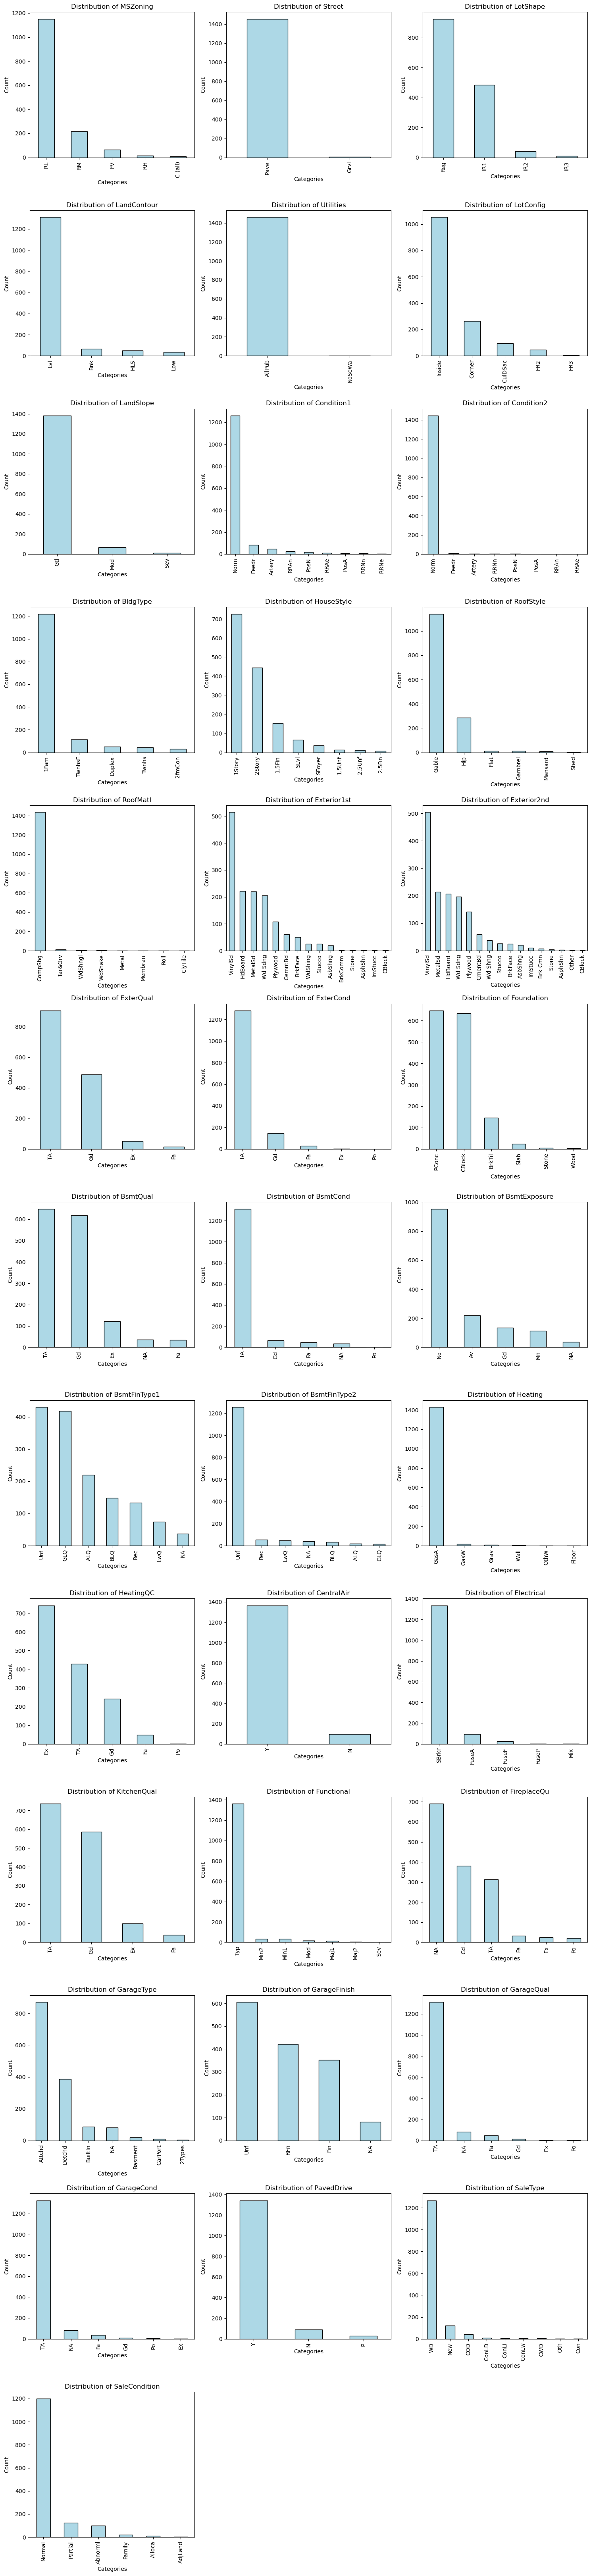

In [38]:
plot_categorical_barcharts(df_train, max_unique=20)

In [173]:
cat_cols = df_train.select_dtypes(include=['object', 'category']).columns

def cat_summary(dataframe, col_name):

    print(pd.DataFrame({

        col_name: dataframe[col_name].value_counts(),  # Count of unique values

        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)  # Percentage of each unique value

    }))

    print("------------------------------------------------------------------")



for col in cat_cols:

    cat_summary(df_train, col)

          MSZoning   Ratio
MSZoning                  
RL            1151 78.8356
RM             218 14.9315
FV              65  4.4521
Others          26  1.7808
------------------------------------------------------------------
          LotShape   Ratio
LotShape                  
Reg            925 63.3562
IR1            484 33.1507
IR2             41  2.8082
Others          10  0.6849
------------------------------------------------------------------
             LandContour   Ratio
LandContour                     
Lvl                 1311 89.7945
Bnk                   63  4.3151
HLS                   50  3.4247
Low                   36  2.4658
------------------------------------------------------------------
           LotConfig   Ratio
LotConfig                   
Inside          1052 72.0548
Corner           263 18.0137
CulDSac           94  6.4384
FR2               47  3.2192
Others             4  0.2740
------------------------------------------------------------------
       

In [175]:
for col in cat_cols:

    cat_summary(df_test, col)

          MSZoning   Ratio
MSZoning                  
RL            1118 76.6278
RM             242 16.5867
FV              74  5.0720
Others          25  1.7135
------------------------------------------------------------------
          LotShape   Ratio
LotShape                  
Reg            934 64.0164
IR1            484 33.1734
IR2             35  2.3989
Others           6  0.4112
------------------------------------------------------------------
             LandContour   Ratio
LandContour                     
Lvl                 1311 89.8561
HLS                   70  4.7978
Bnk                   54  3.7012
Others                24  1.6450
------------------------------------------------------------------
           LotConfig   Ratio
LotConfig                   
Inside          1081 74.0918
Corner           248 16.9979
CulDSac           82  5.6203
FR2               38  2.6045
Others            10  0.6854
------------------------------------------------------------------
       

In [41]:
df_train.SaleCondition.nunique()

6

### <span style="color:red">Dropping Categorical Columns with Imbalanced Distribution</span>


I decided to drop categorical columns with highly imbalanced distributions.  
These columns are dominated by a single category, while the other categories are very rare, which:  
- Do not provide meaningful contributions to the model.  
- May potentially introduce noise.  
For this reason, such columns have been removed from the dataset.


In [43]:
# Droping from test dataset
df_test.drop(["Condition2","RoofMatl","Utilities","Street","Heating"], axis=1, inplace= True)

In [44]:
# Droping from train dataset
df_train.drop(["Condition2","RoofMatl","Utilities","Street","Heating"], axis=1, inplace= True)

## <span style="color:red">Analyzing Numeric Features</span>

We used a custom function to analyze the distribution of numeric features in the dataset.  
This function visualizes the distributions of all numeric columns, allowing us to better understand their behavior, detect skewness, and identify potential outliers.


In [46]:
def plot_numeric_distributions(df):

    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Set up the size of the plot grid
    num_cols = len(numeric_cols)
    num_rows = (num_cols // 3) + 1  # 3 plots per row

    # Create a figure with subplots
    plt.figure(figsize=(15, 5 * num_rows))

    # Loop through each numeric column and create a distribution plot
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(num_rows, 3, i)
        sns.histplot(df[col], kde=True, color='blue', bins=30)
        plt.title(f'Distribution of {col}', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Frequency')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

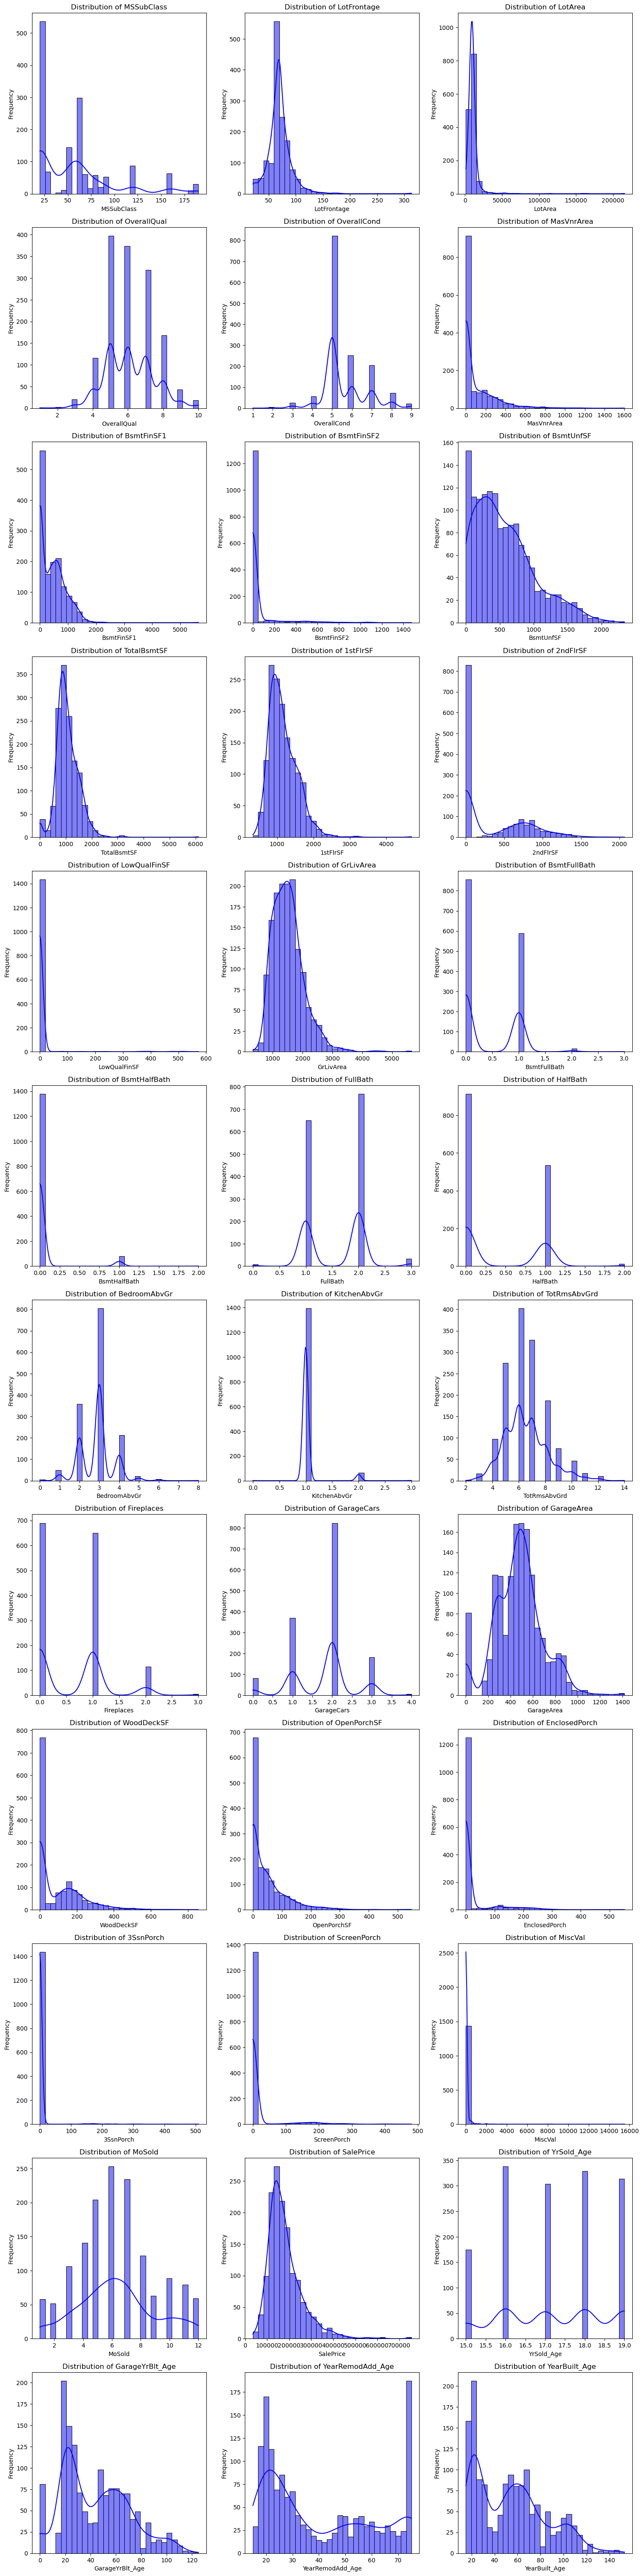

In [47]:
 plot_numeric_distributions(df_train.drop("Id",axis=1))

In [48]:
df_train.select_dtypes(include="number").columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'SalePrice', 'YrSold_Age',
       'GarageYrBlt_Age', 'YearRemodAdd_Age', 'YearBuilt_Age'],
      dtype='object')

In [49]:
# Droping from train dataset
df_train.drop(["LowQualFinSF","3SsnPorch"],axis=1, inplace = True )

In [50]:
# Droping from test dataset
df_test.drop(["LowQualFinSF","3SsnPorch"],axis=1, inplace = True )

In [51]:
import plotly.graph_objs as go

box_plot = go.Box(y=df_train['SalePrice'], name='Selling Price')

fig = go.Figure(data=[box_plot])
fig.update_layout(title='Selling Price Box Plot')
fig.show()

## <span style="color:red">Analyzing Categorical Features hierarchy</span>
  
At this stage, we analyzed the categorical columns to determine whether a hierarchy exists among their categories. Based on this analysis, we decided which columns should be encoded using **Ordinal Encoding** and which should use **One-Hot Encoding**.  

### <span style="color:red">Steps Followed</span>
1. **Examining Feature Descriptions and Contents**  
   - The descriptions and unique values of all categorical columns were reviewed.  
   - Columns with an inherent order or hierarchy in their categories were identified.  

2. **Analyzing the Impact on Sale Price**  
   - Using the **groupby** method, the relationship between the unique values of these columns and the target variable (SalePrice) was examined.  
   - This analysis helped determine whether there was a natural order among the categories.  

### <span style="color:red">Decisions Made</span>
- Columns with a natural hierarchy were assigned to **Ordinal Encoding**.  
- Columns without a natural hierarchy were assigned to **One-Hot Encoding**.  

This process ensures that the categorical features are encoded in a way that best captures their relationship with the target variable, optimizing model performance.


LotShape
Reg   164754.8184
IR1   206101.6653
IR3   216036.5000
IR2   239833.3659
Name: SalePrice, dtype: float64


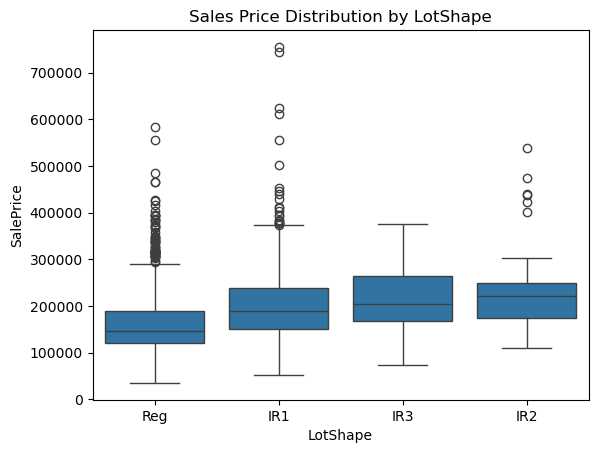

In [53]:
mean_prices = df_train.groupby('LotShape')['SalePrice'].mean().sort_values()
print(mean_prices)

sns.boxplot(x='LotShape', y='SalePrice', data=df_train, order=mean_prices.index)
plt.title("Sales Price Distribution by LotShape")
plt.show()

In [54]:
mean_prices = df_train.groupby('LandSlope')['SalePrice'].mean().sort_values()
print(mean_prices)

LandSlope
Gtl   179956.7996
Mod   196734.1385
Sev   204379.2308
Name: SalePrice, dtype: float64


In [55]:
mean_prices = df_train.groupby('ExterQual')['SalePrice'].mean().sort_values()
print(mean_prices)

ExterQual
Fa    87985.2143
TA   144341.3135
Gd   231633.5102
Ex   367360.9615
Name: SalePrice, dtype: float64


In [56]:
mean_prices = df_train.groupby('BsmtFinType1')['SalePrice'].mean().sort_values()
print(mean_prices)

BsmtFinType1
NA    105652.8919
Rec   146889.2481
BLQ   149493.6554
LwQ   151852.7027
ALQ   161573.0682
Unf   170670.5767
GLQ   235413.7201
Name: SalePrice, dtype: float64


In [57]:
mean_prices = df_train.groupby('GarageFinish')['SalePrice'].mean().sort_values()
print(mean_prices)

GarageFinish
NA    103317.2840
Unf   142156.4231
RFn   202068.8697
Fin   240052.6903
Name: SalePrice, dtype: float64


In [58]:
mean_prices = df_train.groupby('PavedDrive')['SalePrice'].mean().sort_values()
print(mean_prices)

PavedDrive
N   115039.1222
P   132330.0000
Y   186433.9739
Name: SalePrice, dtype: float64


In [59]:
len(df_train.columns)

68

### <span style="color:red">Assigning Low-Frequency Values to "Others</span>
When applying one-hot encoding, low-frequency categorical values can lead to several problems:

1. **Memory Usage:** Creating unnecessary columns for low-frequency categories increases dataset size, leading to excessive memory consumption.
2. **Overfitting Risk:** Rare categories may cause the model to overfit by assigning undue importance to these infrequent values.
3. **Generalization Issues:** Low-frequency categories in the test dataset may not be well-represented in the training dataset, which can negatively impact model performance.

To mitigate these issues, we assign categorical values with a frequency of less than 30 to "Others" in both the training and test datasets. This approach ensures a more balanced dataset and improves the model's generalization capabilities.



In [61]:
one_hot_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'SaleType', 'SaleCondition']

In [62]:
def replace_low_frequency_with_others(dataframe, columns, threshold=50):
    """
    In certain columns, it replaces values ​​with frequency less than threshold with 'Others'.

    Args:
    - dataframe: Pandas DataFrame
    - columns: List of columns to apply the transformation
    - threshold: Frequency threshold (default: 50)

    Returns:
    - Modified DataFrame
    """
    for col in columns:
       
        value_counts = dataframe[col].value_counts()

       
        low_freq_values = value_counts[value_counts < threshold].index

        
        dataframe[col] = dataframe[col].apply(lambda x: "Others" if x in low_freq_values else x)

    return dataframe

In [63]:
replace_low_frequency_with_others(df_train, one_hot_cols, threshold=31)

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0        1          60       RL      65.0000     8450      Reg         Lvl   
1        2          20       RL      80.0000     9600      Reg         Lvl   
2        3          60       RL      68.0000    11250      IR1         Lvl   
3        4          70       RL      60.0000     9550      IR1         Lvl   
4        5          60       RL      84.0000    14260      IR1         Lvl   
...    ...         ...      ...          ...      ...      ...         ...   
1455  1456          60       RL      62.0000     7917      Reg         Lvl   
1456  1457          20       RL      85.0000    13175      Reg         Lvl   
1457  1458          70       RL      66.0000     9042      Reg         Lvl   
1458  1459          20       RL      68.0000     9717      Reg         Lvl   
1459  1460          20       RL      75.0000     9937      Reg         Lvl   

     LotConfig LandSlope Neighborhood  ... ScreenPorch MiscVal MoSold  \
0       Inside       Gtl      CollgCr  ...           0       0      2   
1          FR2       Gtl       Others  ...           0       0      5   
2       Inside       Gtl      CollgCr  ...           0       0      9   
3       Corner       Gtl      Crawfor  ...           0       0      2   
4          FR2       Gtl      NoRidge  ...           0       0     12   
...        ...       ...          ...  ...         ...     ...    ...   
1455    Inside       Gtl      Gilbert  ...           0       0      8   
1456    Inside       Gtl       NWAmes  ...           0       0      2   
1457    Inside       Gtl      Crawfor  ...           0    2500      5   
1458    Inside       Gtl        NAmes  ...           0       0      4   
1459    Inside       Gtl      Edwards  ...           0       0      6   

      SaleType  SaleCondition SalePrice YrSold_Age GarageYrBlt_Age  \
0           WD         Normal    208500         17         22.0000   
1           WD         Normal    181500         18         49.0000   
2           WD         Normal    223500         17         24.0000   
3           WD        Abnorml    140000         19         27.0000   
4           WD         Normal    250000         17         25.0000   
...        ...            ...       ...        ...             ...   
1455        WD         Normal    175000         18         26.0000   
1456        WD         Normal    210000         15         47.0000   
1457        WD         Normal    266500         15         84.0000   
1458        WD         Normal    142125         15         75.0000   
1459        WD         Normal    147500         17         60.0000   

      YearRemodAdd_Age YearBuilt_Age  
0                   22            22  
1                   49            49  
2                   23            24  
3                   55           110  
4                   25            25  
...                ...           ...  
1455                25            26  
1456                37            47  
1457                19            84  
1458                29            75  
1459                60            60  

[1460 rows x 68 columns]

In [64]:
replace_low_frequency_with_others(df_test, one_hot_cols, threshold=31)

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0     1461          20   Others      80.0000    11622      Reg         Lvl   
1     1462          20       RL      81.0000    14267      IR1         Lvl   
2     1463          60       RL      74.0000    13830      IR1         Lvl   
3     1464          60       RL      78.0000     9978      IR1         Lvl   
4     1465         120       RL      43.0000     5005      IR1         HLS   
...    ...         ...      ...          ...      ...      ...         ...   
1454  2915         160       RM      21.0000     1936      Reg         Lvl   
1455  2916         160       RM      21.0000     1894      Reg         Lvl   
1456  2917          20       RL     160.0000    20000      Reg         Lvl   
1457  2918          85       RL      62.0000    10441      Reg         Lvl   
1458  2919          60       RL      74.0000     9627      Reg         Lvl   

     LotConfig LandSlope Neighborhood  ... EnclosedPorch ScreenPorch MiscVal  \
0       Inside       Gtl        NAmes  ...             0         120       0   
1       Corner       Gtl        NAmes  ...             0           0   12500   
2       Inside       Gtl      Gilbert  ...             0           0       0   
3       Inside       Gtl      Gilbert  ...             0           0       0   
4       Inside       Gtl       Others  ...             0         144       0   
...        ...       ...          ...  ...           ...         ...     ...   
1454    Inside       Gtl       Others  ...             0           0       0   
1455    Inside       Gtl       Others  ...             0           0       0   
1456    Inside       Gtl      Mitchel  ...             0           0       0   
1457    Inside       Gtl      Mitchel  ...             0           0     700   
1458    Inside       Mod      Mitchel  ...             0           0       0   

      MoSold  SaleType SaleCondition YrSold_Age GarageYrBlt_Age  \
0          6        WD        Normal         15         64.0000   
1          6        WD        Normal         15         67.0000   
2          3        WD        Normal         15         28.0000   
3          6        WD        Normal         15         27.0000   
4          1        WD        Normal         15         33.0000   
...      ...       ...           ...        ...             ...   
1454       6        WD        Normal         19          0.0000   
1455       4        WD       Abnorml         19         55.0000   
1456       9        WD       Abnorml         19         65.0000   
1457       7        WD        Normal         19          0.0000   
1458      11        WD        Normal         19         32.0000   

      YearRemodAdd_Age YearBuilt_Age  
0                   64            64  
1                   67            67  
2                   27            28  
3                   27            27  
4                   33            33  
...                ...           ...  
1454                55            55  
1455                55            55  
1456                29            65  
1457                33            33  
1458                31            32  

[1459 rows x 67 columns]

In [159]:
cat_cols = df_train.select_dtypes(include=['object', 'category']).columns
def cat_summary(dataframe, col_name):

    print(pd.DataFrame({

        col_name: dataframe[col_name].value_counts(),  # Count of unique values

        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)  # Percentage of each unique value

    }))

    print("------------------------------------------------------------------")



for col in one_hot_cols:

    cat_summary(df_train, col)

          MSZoning   Ratio
MSZoning                  
RL            1151 78.8356
RM             218 14.9315
FV              65  4.4521
Others          26  1.7808
------------------------------------------------------------------
          LotShape   Ratio
LotShape                  
Reg            925 63.3562
IR1            484 33.1507
IR2             41  2.8082
Others          10  0.6849
------------------------------------------------------------------
             LandContour   Ratio
LandContour                     
Lvl                 1311 89.7945
Bnk                   63  4.3151
HLS                   50  3.4247
Low                   36  2.4658
------------------------------------------------------------------
           LotConfig   Ratio
LotConfig                   
Inside          1052 72.0548
Corner           263 18.0137
CulDSac           94  6.4384
FR2               47  3.2192
Others             4  0.2740
------------------------------------------------------------------
       

In [161]:
for col in one_hot_cols:

    cat_summary(df_test, col)

          MSZoning   Ratio
MSZoning                  
RL            1118 76.6278
RM             242 16.5867
FV              74  5.0720
Others          25  1.7135
------------------------------------------------------------------
          LotShape   Ratio
LotShape                  
Reg            934 64.0164
IR1            484 33.1734
IR2             35  2.3989
Others           6  0.4112
------------------------------------------------------------------
             LandContour   Ratio
LandContour                     
Lvl                 1311 89.8561
HLS                   70  4.7978
Bnk                   54  3.7012
Others                24  1.6450
------------------------------------------------------------------
           LotConfig   Ratio
LotConfig                   
Inside          1081 74.0918
Corner           248 16.9979
CulDSac           82  5.6203
FR2               38  2.6045
Others            10  0.6854
------------------------------------------------------------------
       

# <span style="color:red">Data Preprocessing</span>

In this stage, we assigned the feature and target variables, then split the dataset into training and validation sets. During the EDA phase, we identified the features that require ordinal encoding and determined their hierarchical order. These hierarchies were assigned to appropriate variables.

Using the **ColumnTransformer**, we applied preprocessing steps to different types of features:
- **Numeric features**: Standardized using **StandardScaler**.
- **Categorical features**: Processed with **OneHotEncoder** for nominal data and **OrdinalEncoder** for ordinal data.

This approach ensures that all features are properly transformed and ready for model training.


In [68]:
df2_train = df_train[df_train.SalePrice < 400000]


In [69]:
import plotly.graph_objs as go

box_plot = go.Box(y=df2_train['SalePrice'], name='Selling Price')

fig = go.Figure(data=[box_plot])
fig.update_layout(title='Selling Price Box Plot')
fig.show()

In [70]:
df2_train.shape

(1432, 68)

In [71]:
X = df2_train.drop(["Id","SalePrice"], axis = 1)
y = df2_train["SalePrice"]

In [72]:
num_features = X.select_dtypes(include="number").columns

In [73]:
cat_features = X.select_dtypes(include="O").columns

In [74]:
len(num_features)

33

In [75]:
len(cat_features)

33

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In [77]:
landslope_order = ["Gtl" , "Mod" ,"Sev"]
qual_order_1 = [ "Ex" , "Gd" , "TA" , "Fa" , "Po"]
qual_order_2 = [ "Ex" , "Gd" , "TA" , "Fa"]
qual_order_3 = [ "Gd" , "TA" , "Fa" , "Po"]

qual_order_1_0 = [ "NA","Ex" , "Gd" , "TA" , "Fa" , "Po"]
qual_order_2_0 = [ "NA","Ex" , "Gd" , "TA" , "Fa"]
qual_order_3_0 = [ "NA","Gd" , "TA" , "Fa" , "Po"]

bsmtexposure_order = ["Gd" ,"Av" , "Mn" , "No"]
bsmtexposure_order_0 = ["NA","Gd" ,"Av" , "Mn" , "No"]
bsmtfintype1_order = ["GLQ" , "ALQ" , "BLQ" , "Rec" , "LwQ" , "Unf"]
bsmtfintype1_order_0 = ["NA","GLQ" , "ALQ" , "BLQ" , "Rec" , "LwQ" , "Unf"]
garagefinish_order_0 = ["NA","Fin" , "RFn" , "Unf"]
paveddrive_order = ["Y" , "P" ,"N"]

In [78]:
X.drop(['LandSlope','ExterQual', 'ExterCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
                                                                    'HeatingQC', 'KitchenQual', 'GarageFinish','GarageQual',
                                                                    'GarageCond', 'PavedDrive'], axis =1).select_dtypes(include="O").columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'BsmtQual', 'BsmtCond', 'CentralAir',
       'Electrical', 'Functional', 'FireplaceQu', 'GarageType', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [79]:
preprocessor = ColumnTransformer(
    transformers=[
        ('Scaler', StandardScaler(), num_features),
        
        ('onehot', OneHotEncoder(), ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'SaleType', 'SaleCondition']),
        
        ('ordinal', OrdinalEncoder(categories=[landslope_order ,qual_order_2 ,qual_order_1_0 ,qual_order_2_0 ,qual_order_3_0 ,bsmtexposure_order_0 , bsmtfintype1_order_0
                                               ,bsmtfintype1_order_0, qual_order_1, qual_order_2 ,garagefinish_order_0, qual_order_1_0, qual_order_1_0,
                                               paveddrive_order]), ['LandSlope', 'ExterQual', 'ExterCond','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                                                    'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish','GarageQual',
                                                                    'GarageCond', 'PavedDrive']) 
    ])

In [80]:
df_combined = pd.concat([X_train, df_test], axis=0)

In [81]:
df_combined_transformed = preprocessor.fit_transform(df_combined) 

In [82]:
df_combined_transformed

array([[-0.8689634 ,  0.47041352, -0.07345947, ...,  3.        ,
         3.        ,  0.        ],
       [-0.8689634 ,  0.00222945, -0.20586909, ...,  3.        ,
         3.        ,  0.        ],
       [ 0.06698849,  0.00222945,  0.10702665, ...,  3.        ,
         3.        ,  0.        ],
       ...,
       [-0.8689634 ,  4.26270455,  1.31557983, ...,  3.        ,
         3.        ,  0.        ],
       [ 0.65195843, -0.32549941,  0.04606776, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06698849,  0.23632149, -0.06203798, ...,  3.        ,
         3.        ,  0.        ]])

In [83]:
X_train_transformed = preprocessor.fit_transform(X_train)

In [84]:
X_val_transformed = preprocessor.transform(X_val)

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# <span style="color:red">Modeling</span>

## <span style="color:red">XGBoost</span>

In [280]:
operations = [("XGB_model", XGBRegressor(random_state=42))]

xgb_vanilla = Pipeline(steps=operations)

xgb_vanilla.fit(X_train_transformed, y_train)

Pipeline(steps=[('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [146]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [282]:
train_val(xgb_vanilla, X_train_transformed, y_train, X_val_transformed, y_val)

train           test
R2         0.9997         0.8550
mae      775.2394     16168.3485
mse  1161007.4507 613981915.3372
rmse    1077.5006     24778.6585

In [148]:
38751.3044 / y_val.mean()

0.21043597658245364

In [119]:
param_grid = {
    "XGB_model__n_estimators": [ 100, 200, 300],
    "XGB_model__max_depth": [3 , 4 ,5,6],
    "XGB_model__learning_rate": [ 0.05, 0.06, 0.05 , 0.03],
    "XGB_model__subsample": [0.3, 0.5, 0.8],
    "XGB_model__colsample_bytree": [ 0.4 ,0.5 ,0.8, 1]
}

In [150]:
# param_grid = {
#     "XGB_model__n_estimators": [100, 200, 300],
#     "XGB_model__max_depth": [3, 4, 5],
#     "XGB_model__learning_rate": [0.01, 0.03, 0.05],
#     "XGB_model__subsample": [0.6, 0.7, 0.8],
#     "XGB_model__colsample_bytree": [0.5, 0.6, 0.7],
#     "XGB_model__gamma": [0, 0.1],
#     "XGB_model__lambda": [1, 1.5],
#     "XGB_model__alpha": [0, 0.5]
# }

In [121]:
operations = [("XGB_model", XGBRegressor(random_state=42))]

model = Pipeline(steps=operations)

xgb_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True).fit(X_train_transformed, y_train)

In [152]:
train_val(xgb_grid, X_train_transformed, y_train, X_val_transformed, y_val)

train           test
R2          0.9902         0.8297
mae      5901.3607     16103.7442
mse  62973056.6590 995564035.8566
rmse     7935.5565     31552.5599

In [153]:
31995.4183 / y_val.mean()

0.17374865699035952

In [127]:
xgb_grid.best_params_

{'XGB_model__colsample_bytree': 0.4,
 'XGB_model__learning_rate': 0.06,
 'XGB_model__max_depth': 4,
 'XGB_model__n_estimators': 300,
 'XGB_model__subsample': 0.8}

In [137]:
operations = [
              ("XGB_model",
               XGBRegressor(colsample_bytree= 0.4,
                             learning_rate= 0.06,
                             max_depth= 4,
                             n_estimators= 300,
                             subsample= 0.8))]

f_i_xgb = Pipeline(steps=operations)

f_i_xgb.fit(X_train_transformed, y_train)

Pipeline(steps=[('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.4, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.06,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [141]:
f_i_xgb["XGB_model"].feature_importances_

array([0.00098004, 0.0015095 , 0.00655081, 0.06433024, 0.0020228 ,
       0.01621494, 0.00625571, 0.00241351, 0.00892342, 0.00301553,
       0.00110592, 0.01445329, 0.01712636, 0.00891413, 0.02572094,
       0.00477789, 0.00017152, 0.03718889, 0.00616055, 0.00244809,
       0.01156705, 0.00961426, 0.01411655, 0.00221601, 0.08213537,
       0.01190851, 0.00174971, 0.00237848, 0.00075782, 0.00073896,
       0.00017236, 0.00070275, 0.00056535, 0.00036542, 0.00090152,
       0.00029894, 0.00589657, 0.0052527 , 0.00032254, 0.00030361,
       0.00095279, 0.00326655, 0.00292654, 0.00155858, 0.00048408,
       0.00104754, 0.00031319, 0.00077418, 0.00030862, 0.00130512,
       0.00040284, 0.        , 0.        , 0.        , 0.00052464,
       0.0018458 , 0.00017474, 0.00338675, 0.00071213, 0.00065125,
       0.00022364, 0.00019198, 0.00244835, 0.00044226, 0.        ,
       0.00073106, 0.0087029 , 0.00199814, 0.00458384, 0.00050669,
       0.00028351, 0.00024533, 0.00094217, 0.00157997, 0.00039

In [ ]:
pipe_model["OrdinalEncoder"].get_feature_names_out()

## <span style="color:red">AdaBoost</span>

In [120]:
operations = [
              ("Ada_model", AdaBoostRegressor(random_state=42))]

ada_vanilla = Pipeline(steps=operations)

ada_vanilla.fit(X_train_transformed, y_train)

Pipeline(steps=[('Ada_model', AdaBoostRegressor(random_state=42))])

In [126]:
train_val(ada_vanilla, X_train_transformed, y_train, X_val_transformed, y_val)

train            test
R2           0.8835          0.7668
mae      21202.1223      23894.2604
mse  747255391.7841 1363623312.9886
rmse     27335.9725      36927.2706

In [128]:
36927.2706 / y_val.mean()

0.20053070139325502

In [158]:
param_grid = {
    "Ada_model__n_estimators": [100, 200, 300], 
    "Ada_model__learning_rate": [0.3, 0.5, 1.0],  
    "Ada_model__loss": ["linear", "square", "exponential"]  
}

In [160]:
base_estimator=DecisionTreeRegressor(max_depth=2)

operations = [("Ada_model", AdaBoostRegressor(estimator=base_estimator, random_state=101))]

model = Pipeline(steps=operations)

ada_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True).fit(X_train_transformed, y_train)

In [154]:
train_val(ada_grid, X_train_transformed, y_train, X_val_transformed, y_val)

train            test
R2            0.8224          0.7396
mae       25652.0553      26788.9881
mse  1139389627.5035 1522604847.8018
rmse      33754.8460      39020.5695

In [156]:
ada_grid.best_params_

{'Ada_model__learning_rate': 0.1,
 'Ada_model__loss': 'exponential',
 'Ada_model__n_estimators': 300}

## <span style="color:red">GradientBoost</span>

In [163]:
from sklearn.ensemble import GradientBoostingRegressor

operations = [("GB_model", GradientBoostingRegressor(random_state=42))]

grad_vanilla = Pipeline(steps=operations)

grad_vanilla.fit(X_train_transformed, y_train)

Pipeline(steps=[('GB_model', GradientBoostingRegressor(random_state=42))])

In [165]:
train_val(grad_vanilla, X_train_transformed, y_train, X_val_transformed, y_val)

train           test
R2           0.9584         0.8994
mae      10112.4666     14788.4610
mse  178234118.3763 461002344.5643
rmse     13350.4351     21470.9652

In [164]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Eğitim ve test veri setlerini birleştir
df_combined = pd.concat([X_train, df_test], axis=0)

# Preprocessing'i yeniden tanımlayın
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), num_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), 
         ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
          'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
          'Exterior2nd', 'Foundation', 'CentralAir',
          'Electrical', 'Functional', 'GarageType', 'SaleType', 'SaleCondition']),
        ('ordinal', OrdinalEncoder(categories=[
            landslope_order, qual_order_2, qual_order_1_0, qual_order_2_0,
            qual_order_3_0, bsmtexposure_order_0, bsmtfintype1_order_0,
            bsmtfintype1_order_0, qual_order_1, qual_order_2,
            garagefinish_order_0, qual_order_1_0, qual_order_1_0,
            paveddrive_order]), 
         ['LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
          'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
          'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']) 
    ],
    remainder='passthrough'  # Diğer sütunları olduğu gibi bırak
)

# Birleştirilmiş veriyi dönüştür
df_combined_transformed = preprocessor.fit_transform(df_combined)
X_val_transformed = preprocessor.transform(df_combined)

# Eğitim ve test veri setlerini tekrar ayır
X_train_transformed = df_combined_transformed[:len(X_train)]
test_transformed = df_combined_transformed[len(X_train):]

In [203]:
X_val_transformed = preprocessor.transform(df_combined)


In [215]:
X_val_transformed.shape

(2604, 142)

In [221]:
y_val.shape

(287,)

In [217]:
X_train_transformed.shape

(1145, 142)

In [ ]:
df_combined_transformed

In [195]:
X_train_transformed = df_combined_transformed[:len(X_train)]
test_transformed = df_combined_transformed[len(X_train):]

In [175]:
df_combined

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
1165          20       RL      79.0000     9541      IR1         Lvl   
31            20       RL      69.0000     8544      IR1         Lvl   
214           60       RL      69.0000    10900      IR1         Lvl   
902           60       RL      63.0000     7875      Reg         Lvl   
370           60       RL      69.0000     8121      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1454         160       RM      21.0000     1936      Reg         Lvl   
1455         160       RM      21.0000     1894      Reg         Lvl   
1456          20       RL     160.0000    20000      Reg         Lvl   
1457          85       RL      62.0000    10441      Reg         Lvl   
1458          60       RL      74.0000     9627      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1  ... ScreenPorch MiscVal  \
1165    Inside       Gtl      NridgHt       Norm  ...           0       0   
31     CulDSac       Gtl       Sawyer       Norm  ...           0       0   
214        FR2       Gtl      CollgCr       Norm  ...           0     450   
902     Inside       Gtl      Gilbert       Norm  ...           0       0   
370     Inside       Gtl      Gilbert       Norm  ...           0       0   
...        ...       ...          ...        ...  ...         ...     ...   
1454    Inside       Gtl       Others       Norm  ...           0       0   
1455    Inside       Gtl       Others       Norm  ...           0       0   
1456    Inside       Gtl      Mitchel       Norm  ...           0       0   
1457    Inside       Gtl      Mitchel       Norm  ...           0     700   
1458    Inside       Mod      Mitchel       Norm  ...           0       0   

      MoSold  SaleType SaleCondition YrSold_Age GarageYrBlt_Age  \
1165       9       New       Partial         16         16.0000   
31         6        WD        Normal         17         59.0000   
214        3        WD        Normal         15         48.0000   
902        7        WD        Normal         19         22.0000   
370        1        WD        Normal         19         25.0000   
...      ...       ...           ...        ...             ...   
1454       6        WD        Normal         19          0.0000   
1455       4        WD       Abnorml         19         55.0000   
1456       9        WD       Abnorml         19         65.0000   
1457       7        WD        Normal         19          0.0000   
1458      11        WD        Normal         19         32.0000   

      YearRemodAdd_Age YearBuilt_Age        Id  
1165                16            16       NaN  
31                  19            59       NaN  
214                 48            48       NaN  
902                 22            22       NaN  
370                 25            25       NaN  
...                ...           ...       ...  
1454                55            55 2915.0000  
1455                55            55 2916.0000  
1456                29            65 2917.0000  
1457                33            33 2918.0000  
1458                31            32 2919.0000  

[2604 rows x 67 columns]

In [167]:
param_grid = {"GB_model__n_estimators":[200,300], 
              "GB_model__subsample":[0.7, 0.8, 1], 
              "GB_model__max_features" : [4,5,6],
              "GB_model__learning_rate": [0.05 ,0.02,0.5], 
              'GB_model__max_depth':[3,5,6],
              'GB_model__min_samples_split':[2,4],
              'GB_model__min_samples_leaf':[2,4]}


In [169]:
operations = [("GB_model", GradientBoostingRegressor(random_state=42))]

model = Pipeline(steps=operations)

grad_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True).fit(X_train_transformed, y_train)

In [171]:
train_val(grad_grid, X_train_transformed, y_train, X_val_transformed, y_val)

train           test
R2          0.9779         0.8960
mae      7187.5620     14954.3324
mse  94434728.1570 476729623.6690
rmse     9717.7532     21834.1389

In [307]:
21834.1389 / y_val.mean()

0.12392332113941465

In [309]:
grad_grid.best_params_

{'GB_model__learning_rate': 0.05,
 'GB_model__max_depth': 5,
 'GB_model__max_features': 4,
 'GB_model__min_samples_leaf': 2,
 'GB_model__min_samples_split': 2,
 'GB_model__n_estimators': 300,
 'GB_model__subsample': 0.8}

In [817]:
df_test.shape

(1459, 66)

In [819]:
df_train.shape

(1460, 67)

In [831]:
test_transformed.shape

(1459, 141)

In [833]:
X_train_transformed.shape 

(1145, 140)

In [323]:
test_transformed = preprocessor.fit_transform(df_test)

In [327]:
pred_validation = grad_grid.predict(test_transformed)

ValueError: X has 140 features, but GradientBoostingRegressor is expecting 141 features as input.

In [363]:
onehot_encoded_columns = preprocessor.named_transformers_['onehot'].get_feature_names_out(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
                                                                                           'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
                                                                                           'Exterior2nd', 'Foundation', 'CentralAir', 'Electrical', 'Functional',
                                                                                           'GarageType', 'SaleType', 'SaleCondition'])

# Tüm sütun adlarını birleştirme
final_columns = list(num_features) + \
                list(onehot_encoded_columns) + \
                ['LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']

In [365]:
final_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'YrSold_Age',
 'GarageYrBlt_Age',
 'YearRemodAdd_Age',
 'YearBuilt_Age',
 'MSZoning_FV',
 'MSZoning_Others',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_Others',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Lvl',
 'LandContour_Others',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_Inside',
 'LotConfig_Others',
 'Neighborhood_BrkSide',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mit

In [329]:
test_transformed.shape

(1459, 140)

In [335]:
X_train_transformed.shape

(1145, 141)

In [341]:
train_data = pd.DataFrame(X_train_transformed)
test_data = pd.DataFrame(test_transformed)

In [343]:
missing_columns = set(train_data.columns) - set(test_data.columns)
extra_columns = set(test_data.columns) - set(train_data.columns)

print("Eksik sütunlar:", missing_columns)
print("Fazla sütunlar:", extra_columns)


Eksik sütunlar: {140}
Fazla sütunlar: set()


In [361]:
print(test_data.iloc[:, -1].value_counts())


139
0.0000    1301
2.0000     126
1.0000      32
Name: count, dtype: int64


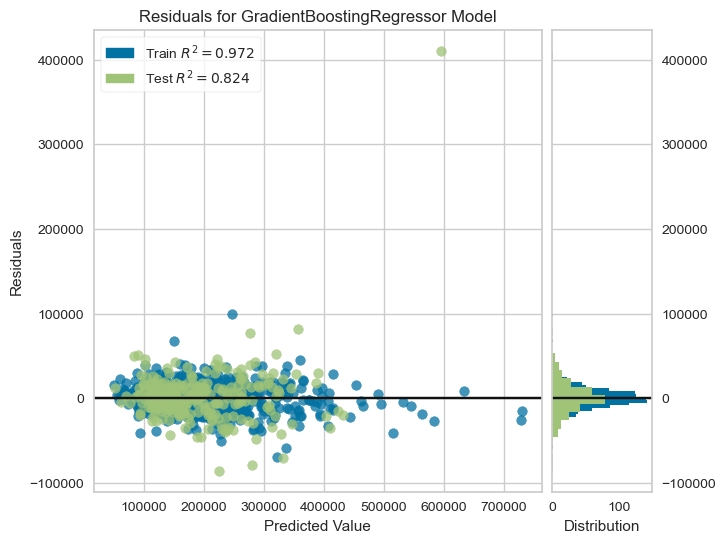

In [240]:
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 600))
model = grad_vanilla
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_transformed, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val_transformed, y_val)  # Evaluate the model on the test data
visualizer.show();

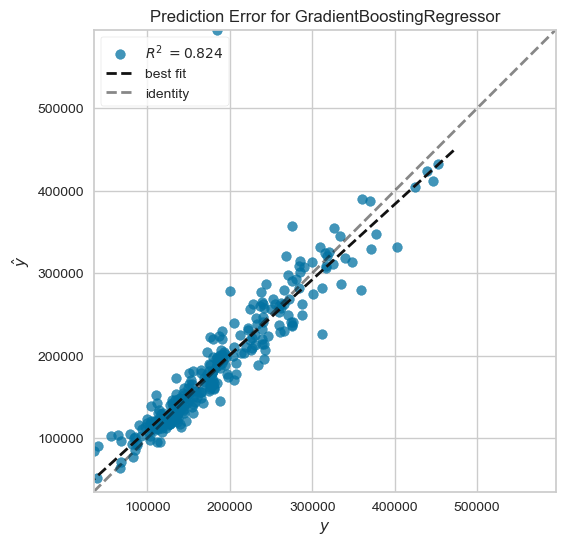

In [244]:
visualizer = RadViz(size=(720, 600))

model = grad_vanilla
visualizer = PredictionError(model)
visualizer.fit(X_train_transformed, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val_transformed, y_val)  # Evaluate the model on the test data
visualizer.show();

In [250]:
len(df_train[df_train.SalePrice > 400000])

28

## <span style="color:red">RandomForest</span>

In [210]:
operations = [
              ("RF_model", RandomForestRegressor(random_state=42))]

rf_vanilla = Pipeline(steps=operations)

rf_vanilla.fit(X_train_transformed, y_train)

Pipeline(steps=[('RF_model', RandomForestRegressor(random_state=42))])

In [212]:
train_val(rf_vanilla, X_train_transformed, y_train, X_val_transformed, y_val)

train            test
R2           0.9781          0.8008
mae       6496.9092      18179.4617
mse  140765414.8763 1164893250.6862
rmse     11864.4602      34130.5325

In [214]:
operations = [
              ("RF_model", RandomForestRegressor(random_state=42))]

rf_grid = Pipeline(steps=operations)

In [228]:
param_grid = {"RF_model__criterion":["squared_error", "absolute_error"], 
              "RF_model__n_estimators":[200, 300],
              "RF_model__max_depth": [3,5,6],
              "RF_model__min_samples_leaf": [2, 3],
              "RF_model__min_samples_split": [2, 3],
              "RF_model__max_features":['auto', X.shape[1]/3, 6]} 

In [230]:
model  = Pipeline(steps=operations)

In [232]:
rf_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring="neg_root_mean_squared_error",
                          cv=5,
                          n_jobs=-1,
                          return_train_score=True).fit(X_train_transformed, y_train)

In [234]:
train_val(rf_grid, X_train_transformed, y_train, X_val_transformed, y_val)

train            test
R2            0.8217          0.7663
mae       21905.2380      25307.8392
mse  1143784243.9592 1366551503.4625
rmse      33819.8794      36966.8974

In [226]:
rf_grid.best_params_

{'RF_model__criterion': 'squared_error',
 'RF_model__max_depth': 5,
 'RF_model__max_features': 6,
 'RF_model__min_samples_leaf': 1,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 64}